# Tarea 3. Midiendo rendimiento y riesgo en un portafolio.

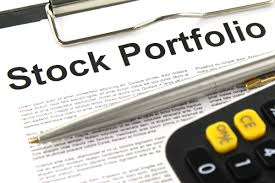

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tickers = ['^GSPC','MSFT','WBA','TSLA']
start_date = '2015-01-01'
end_date = '2024-02-12'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

tickers2 = ['MSFT','WBA','TSLA']
start_date = '2015-01-01'
end_date = '2024-02-12'
df2 = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']

df

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  3 of 3 completed


,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,40.378071,14.620667,55.410751,2058.199951
2015-01-05,40.006763,14.006000,54.317127,2020.579956
2015-01-06,39.419571,14.085333,54.455658,2002.609985
2015-01-07,39.920403,14.063333,55.848202,2025.900024
2015-01-08,41.094784,14.041333,56.540874,2062.139893
...,...,...,...,...
2024-02-05,404.901245,181.059998,21.911457,4942.810059
2024-02-06,404.741516,185.100006,22.850803,4954.229980
2024-02-07,413.285706,187.580002,22.554167,4995.060059


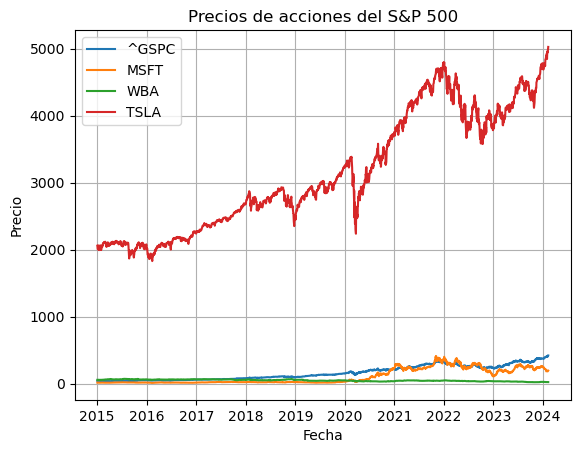

In [2]:
plt.plot(df, label=tickers)
plt.title('Precios de acciones del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid()

In [3]:
rt = df.pct_change().dropna()
rt2 = df2.pct_change().dropna()
rt

,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014677,0.005664,0.002550,-0.008893
2015-01-07,0.012705,-0.001562,0.025572,0.011630
2015-01-08,0.029418,-0.001564,0.012403,0.017888
2015-01-09,-0.008405,-0.018802,-0.024243,-0.008404
...,...,...,...,...
2024-02-05,-0.013545,-0.036454,-0.021201,-0.003186
2024-02-06,-0.000394,0.022313,0.042870,0.002310
2024-02-07,0.021110,0.013398,-0.012981,0.008241


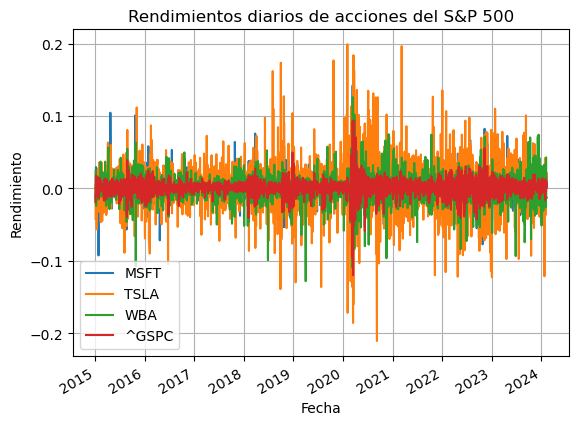

In [4]:
rt.plot()
plt.title('Rendimientos diarios de acciones del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.grid()

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [5]:
diario = pd.DataFrame({
    'Volatilidad' : rt2.std(),
    'Rendimiento' : rt2.mean()
})
diario

,Volatilidad,Rendimiento
MSFT,0.017468,0.001175
TSLA,0.035488,0.001757
WBA,0.019053,-0.000221


In [6]:
anual = pd.DataFrame({
    'Volatilidad' : rt2.std() * np.sqrt(252),
    'Rendimiento' : rt2.mean() * 252
})
anual

,Volatilidad,Rendimiento
MSFT,0.277294,0.296077
TSLA,0.563359,0.442705
WBA,0.302463,-0.055684


In [7]:
covs = rt2.cov()
covs

,MSFT,TSLA,WBA
MSFT,0.000305,0.000254,0.000112
TSLA,0.000254,0.001259,0.000120
WBA,0.000112,0.000120,0.000363


In [8]:
corrs = rt2.corr()
corrs

,MSFT,TSLA,WBA
MSFT,1.000000,0.410050,0.337791
TSLA,0.410050,1.000000,0.176991
WBA,0.337791,0.176991,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT y TSLA.
 - Portafolio 2: 30% MSFT, 70% TSLA.
 - Portafolio 3: 10% MSFT, 90% TSLA.
 - Portafolio 4: 80% MSFT, 20% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [9]:
# Rendimientos diarios
p1 = 0.5 * diario.Rendimiento.MSFT + 0.5 * diario.Rendimiento.TSLA
p2 = 0.3 * diario.Rendimiento.MSFT + 0.7 * diario.Rendimiento.TSLA
p3 = 0.1 * diario.Rendimiento.MSFT + 0.9 * diario.Rendimiento.TSLA
p4 = 0.8 * diario.Rendimiento.MSFT + 0.2 * diario.Rendimiento.TSLA

p1, p2, p3, p4

(0.0014658364256833977,
 0.0015822078264058552,
 0.001698579227128313,
 0.0012912793245997113)

In [10]:
vol_M = diario.Volatilidad.MSFT
vol_T = diario.Volatilidad.TSLA
cov_MT = covs.MSFT.TSLA
vol_M, vol_T, cov_MT

(0.017467881452900912, 0.035488311398547454, 0.0002541923541568833)

\begin{align}
\sigma_p^2 & = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 cov_{12} \\
\end{align}

In [11]:
w11, w21 = 0.5, 0.5
w12, w22 = 0.3, 0.7
w13, w23 = 0.1, 0.9
w14, w24 = 0.8, 0.2

vol_p1 = np.sqrt(w11**2 * vol_M**2 + w21**2 *vol_T**2 + 2*w11*w21 * cov_MT)
vol_p2 = np.sqrt(w12**2 * vol_M**2 + w22**2 *vol_T**2 + 2*w12*w22 * cov_MT)
vol_p3 = np.sqrt(w13**2 * vol_M**2 + w23**2 *vol_T**2 + 2*w13*w23 * cov_MT)
vol_p4 = np.sqrt(w14**2 * vol_M**2 + w24**2 *vol_T**2 + 2*w14*w24 * cov_MT)

vol_p1, vol_p2, vol_p3, vol_p4

(0.022764730597388143,
 0.027410547762997343,
 0.03269459116991963,
 0.018083129373443012)

In [12]:
algo = pd.DataFrame({
    'Volatilidad' : [vol_p1 * np.sqrt(252), vol_p2 * np.sqrt(252), 
                     vol_p3 * np.sqrt(252), vol_p4 * np.sqrt(252)],
    'Rendimiento' : [p1 * 252,p2 * 252 ,p3 * 252,p4 * 252]
})
algo.index = ['p1', 'p2', 'p3', 'p4']
algo

,Volatilidad,Rendimiento
p1,0.361379,0.369391
p2,0.435129,0.398716
p3,0.519011,0.428042
p4,0.287061,0.325402


El DataFrame muestra la volatilidad y rendimientos anuales de los 4 portafolios realizados.

## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

In [13]:
tabla = pd.DataFrame(columns=['Volatilidad', 'Rendimiento'], 
                     index=['p1','p2','p3','p4','MSFT','TSLA','S&P 500'])
tabla.index.name = 'Activo'
tabla['Volatilidad']=np.array([vol_p1 * np.sqrt(252), vol_p2 * np.sqrt(252), 
                               vol_p3 * np.sqrt(252), vol_p4 * np.sqrt(252),
                              vol_M * np.sqrt(252), vol_T * np.sqrt(252), rt['^GSPC'].std()*np.sqrt(252)])
tabla['Rendimiento']=np.array([p1 * 252, p2 * 252, 
                              p3 * 252, p4 *252,
                              anual.Rendimiento.MSFT, anual.Rendimiento.TSLA, rt['^GSPC'].mean()*252])

tabla

,Volatilidad,Rendimiento
Activo,,
p1,0.361379,0.369391
p2,0.435129,0.398716
p3,0.519011,0.428042
p4,0.287061,0.325402
MSFT,0.277294,0.296077
TSLA,0.563359,0.442705
S&P 500,0.182425,0.114946


Text(0, 0.5, 'Rendimiento E[x]')

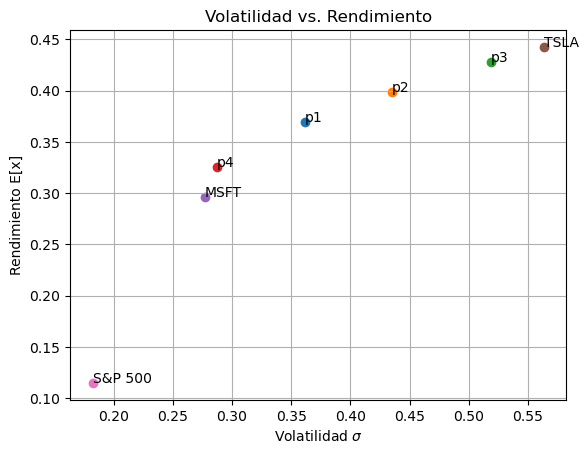

In [14]:
for i in range(len(tabla)):
    flag = tabla.iloc[i]
    plt.scatter(flag.Volatilidad, flag.Rendimiento)
    plt.text(flag.Volatilidad, flag.Rendimiento, tabla.index[i])
plt.grid()
plt.title('Volatilidad vs. Rendimiento')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento E[x]')


El gráfico nos muestra los 4 portafolios que hicimos, los activos individuales de Microsoft y Tesla, así como el S&P 500. Lo primero a resaltar es que Microsoft es inferior al portafolio 4 por que tiene casi la misma volatilidad pero menos rendimiento, además vemos que los 4 portafolios forman una curva y Microsoft no se encuentra ahí. EL S&P 500 tanto su volatilidad como rendimientos se encuentran bastante lejos de los portafolios y activos, por lo que es difícil de comparar.

En caso de no importar la volatilidad, Tesla sería la mejor opción ya que ofrece el rendimiento más alto, en general los 4 portafolios son relativamente igual de buenos considerando el rendimiento y la volatilidad que ofrecen. También se cumple el concepto de a más volatilidad (riesgo) hay un mayor rendimiento.